In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

file_path = '/Users/fenglingyi/Downloads/final_file.csv'
df = pd.read_csv(file_path)

df = df.dropna()

# Defining features (X) and target variables (y)
X = df[['beds', 'baths', 'parking', 'minimum_distance_station', 
        'minimum_distance_school', 'minimum_distance_police', 
        'minimum_distance_supermarket', 'minimum_distance_library', 
        'minimum_distance_gym', 'minimum_distance_cbd', '2022_population', 
        '2023_population', 'ERP change %', 'Net overseas migration', 
        'Population density 2023 (persons/km2)', 'Median_tot_prsnl_inc_weekly', 
        '2021_population', 'Mar 2021', 'Jun 2021', 'Sep 2021', 
        'Dec 2021', 'Mar 2022', 'Jun 2022', 'Sep 2022', 'Dec 2022', 'Mar 2023',
        'Number_of_Schools', '2021crime', '2022crime', '2023crime', 'Median age', 
        'People aged 0-14 years', 'People aged 15-64 years', 'People aged 65 years and over']]
y = df['price']  

# Divide the data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=42)

# Define a hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# train model
grid_search_rf.fit(X_train, y_train)


# Prediction using the best parameters
best_rf_model = grid_search_rf.best_estimator_

# predict
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

# evaluation model
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Evaluation indicators on the training set:")
print(f"MSE: {mse_train_rf:.4f}, RMSE: {rmse_train_rf:.4f}, MAE: {mae_train_rf:.4f}, R²: {r2_train_rf:.4f}")

print(f"Evaluation indicators on the testing set:")
print(f"MSE: {mse_test_rf:.4f}, RMSE: {rmse_test_rf:.4f}, MAE: {mae_test_rf:.4f}, R²: {r2_test_rf:.4f}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/fenglingyi/myenv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


最佳参数: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
训练集上的评价指标:
MSE: 248925.4136, RMSE: 498.9243, MAE: 109.8436, R²: 0.8628
测试集上的评价指标:
MSE: 47269.5888, RMSE: 217.4157, MAE: 111.9863, R²: 0.6113


                                  Feature  Importance
0                                    beds    0.650336
1                                   baths    0.162458
15            Median_tot_prsnl_inc_weekly    0.054724
25                               Mar 2023    0.025460
9                    minimum_distance_cbd    0.022330
2                                 parking    0.020489
17                               Mar 2021    0.005978
6            minimum_distance_supermarket    0.005478
3                minimum_distance_station    0.005398
14  Population density 2023 (persons/km2)    0.004771
8                    minimum_distance_gym    0.004644
5                 minimum_distance_police    0.004421
32                People aged 15-64 years    0.003498
4                 minimum_distance_school    0.003004
31                 People aged 0-14 years    0.002982
7                minimum_distance_library    0.002879
19                               Sep 2021    0.002191
33          People aged 65 y

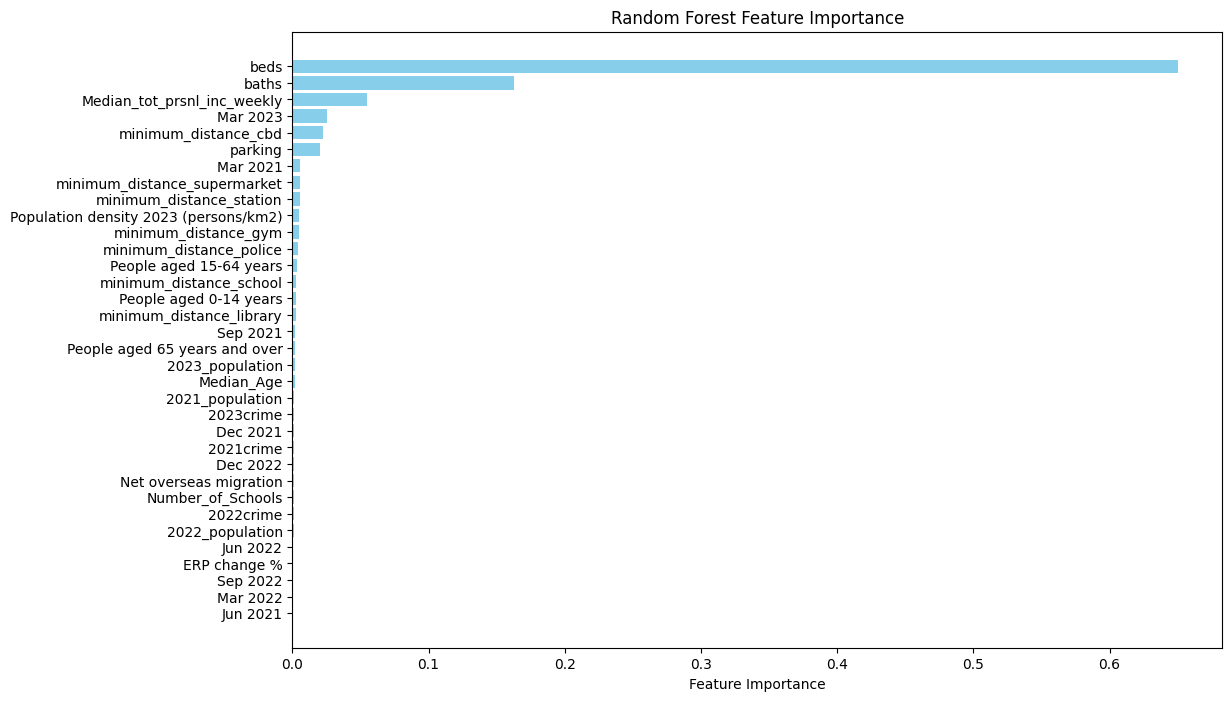

In [3]:
# 获取特征重要性
importances = best_rf_model.feature_importances_

# 将特征名和重要性结合起来
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# 按重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 输出特征重要性
print(feature_importance_df)

# 可视化特征重要性
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.savefig('../plots/rf_importance.png')
plt.show()
